In [1]:
%matplotlib inline

import notebook
#from notebook.nbextensions import enable_nbextension
#enable_nbextension('notebook', 'usability/codefolding/main')
import numpy as np
from astropy.time import Time
from astropy.io import fits
import glob
import itertools
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sns
import os
from scipy.optimize import curve_fit
import sys
from astropy import wcs 
from astropy.coordinates import SkyCoord
import astropy.units as u
import cStringIO
from matplotlib.colors import LogNorm
from astropy.nddata import Cutout2D
from matplotlib.patches import Circle
sys.path.append('/Users/vs/Dropbox/Python')

bigfontsize=20
labelfontsize=16
tickfontsize=16
sns.set_context('talk')
mp.rcParams.update({'font.size': bigfontsize,
                     'axes.labelsize':labelfontsize,
                     'xtick.labelsize':tickfontsize,
                     'ytick.labelsize':tickfontsize,
                     'legend.fontsize':tickfontsize,
                     })

In [2]:
#input_target = sys.argv[1]
#input_channel = sys.argv[2]
#catalog = sys.argv[3]

input_target = 'omegaCen_1'
input_channel = '3p6um'
catalog = '/Users/vs/Dropbox/Publications/omegaCen/calibrated_files/kaluzny_catalogues/kaluzny2004_reformatted'
ref_image = input_target + '_e1_' + input_channel + '_dn.fits'

In [3]:
if (input_channel == '1' or input_channel == '3p6um'):
    channel = '3p6um'
if (input_channel =='2' or input_channel == '4p5um'):
    channel = '4p5um'
    
field = input_target[-1]
#print field, channel


In [15]:
#### Comment out this cell if not running on Vicky's computer

#path = '/Volumes/Khaleesi/CRRP/Globular_Cluster_Output/omegaCen/'+ input_target +'_'+ channel + '/' + input_target + '_e*_' + channel + '_dn.fits'
#input_image_list = glob.glob(path)
#input_lc_data = input_target + '_' + channel + '.cal'

#mjds = np.zeros(len(input_image_list))

## Commenting this out for now - using a list of MJDS rather than reading them from headers.

#for count in range(0, len(input_image_list)):
#    hdulist = fits.open(input_image_list[count])
#    prihdr = hdulist[0].header
#    date_obs = Time(prihdr['date_obs'])
#    mjds[count] = date_obs.mjd

In [4]:
#### Uncomment this cell if not running on Vicky's computer

## Get the mjds from these files - only applicable to omega cen data

mjd_file = input_target + '_' + channel + '.mjds'
epoch_num, mjds = np.loadtxt(mjd_file, unpack=True)
input_lc_data = input_target + '_' + channel + '.cal'


In [5]:
if ((len(mjds) % 6 ) == 0):
    n_lines_raw = int((len(mjds) / 6) + 1)
else:
    n_lines_raw = int(np.ceil(len(mjds)) / 6 + 1)

with open(input_lc_data) as input:
    lines = []
    while True:
        line = list(itertools.islice(input, n_lines_raw))
        if line:
            lines.append(line)
        else:
            break


num_stars = len(lines)
num_frames = len(mjds)
objects = np.zeros((num_stars, (num_frames*2) + 3))
for star in np.arange(0,num_stars):
    data = "".join(lines[star])
    data = data.split()
    objects[star][0] = data[0] ## ID
    objects[star][1] = data[1] ## XC
    objects[star][2] = data[2] ## YC
    for epoch in np.arange(0,(num_frames*2), 2):
        objects[star][epoch + 3]  = data[epoch + 3] ## mag
        objects[star][epoch + 4] = data[epoch + 4] ## err
        

In [6]:
cols = ['als_id', 'xc', 'yc'] 

for epochs in np.arange(len(mjds)):
    mag_name = ('mag_' + str(epochs+1))
    err_name = ('err_' + str(epochs+1))
    cols.append(mag_name)
    cols.append(err_name)

cols

input_lc_df = pd.DataFrame(objects, columns=cols)
kaluzny = pd.read_csv(catalog, delim_whitespace=True, header=None, names=('ID', 'RA', 'Dec', 'Period', 'Vmag', 'Type'))

In [7]:
input_lc_df

,als_id,xc,yc,mag_1,err_1,mag_2,err_2,mag_3,err_3,mag_4,...,mag_8,err_8,mag_9,err_9,mag_10,err_10,mag_11,err_11,mag_12,err_12
0,15853.0,901.055,19.253,17.018,0.266,16.372,0.192,17.380,0.219,16.933,...,17.019,0.173,16.929,0.188,16.841,0.162,17.053,0.220,17.084,0.241
1,15418.0,881.260,19.428,17.163,0.266,16.056,0.168,17.065,0.193,16.898,...,17.420,0.255,17.103,0.230,17.201,0.260,18.198,0.462,17.295,0.185
2,17567.0,987.443,20.064,16.600,0.210,15.564,0.133,16.530,0.156,16.239,...,16.308,0.096,16.290,0.108,16.204,0.103,17.057,0.279,17.137,0.298
3,21510.0,1171.678,20.508,17.025,0.130,16.231,0.121,16.931,0.073,18.092,...,16.678,0.103,16.794,0.171,16.960,0.122,16.543,0.081,16.738,0.096
4,16237.0,920.343,20.599,17.128,0.107,16.112,0.087,16.817,0.073,16.777,...,17.029,0.165,16.862,0.108,17.040,0.120,17.308,0.136,17.011,0.125
5,21447.0,1167.314,21.002,16.749,0.096,16.042,0.092,16.890,0.114,17.621,...,16.552,0.094,16.890,0.174,16.253,0.076,16.594,0.101,16.201,0.092
6,22336.0,1210.729,21.134,17.134,0.336,16.469,0.354,16.979,0.230,17.143,...,17.627,0.489,17.507,0.373,17.179,0.307,16.946,0.352,16.685,0.258
7,22942.0,1234.109,21.233,13.043,0.086,12.113,0.092,12.771,0.082,12.816,...,12.978,0.060,13.076,0.092,12.939,0.082,12.945,0.118,12.878,0.084
8,22510.0,1215.752,21.257,17.094,0.222,16.916,0.314,17.809,0.389,17.104,...,17.407,0.190,17.346,0.203,17.584,0.228,17.346,0.444,17.714,0.422
9,18158.0,1012.070,21.594,16.265,0.092,16.013,0.191,16.863,0.188,17.046,...,16.595,0.117,16.660,0.112,16.783,0.133,16.877,0.211,16.601,0.153


In [8]:
kaluzny

,ID,RA,Dec,Period,Vmag,Type
0,V3,13:25:56.15,-47:25:53.8,0.841258,14.01,RR0
1,V4,13:26:12.93,-47:24:18.8,0.627320,13.83,RR0
2,V5,13:26:18.33,-47:23:12.4,0.515274,14.00,RR0
3,V7,13:27:00.90,-47:14:00.5,0.713000,14.08,RR0
4,V8,13:27:48.45,-47:28:20.3,0.521329,13.90,RR0
5,V9,13:25:59.58,-47:26:24.0,0.523480,14.10,RR0
6,V10,13:26:06.99,-47:24:36.6,0.374976,14.31,RR1
7,V11,13:26:30.59,-47:23:01.6,0.564789,14.20,RR0
8,V12,13:26:27.21,-47:24:06.2,0.386769,14.32,RR1
9,V13,13:25:58.18,-47:25:21.6,0.669039,13.92,RR0


In [9]:
hdulist = fits.open(ref_image)
w = wcs.WCS(hdulist[0].header)
coords = SkyCoord(ra=kaluzny.RA, dec=kaluzny.Dec, frame='icrs', unit=(u.hour, u.deg))
kaluzny['xc'], kaluzny['yc'] = wcs.utils.skycoord_to_pixel(coords, w, 0, 'all')
image_range = hdulist[0].data.shape
hdulist.close()

image_limit_x = image_range[1]
image_limit_y = image_range[0]

In [10]:
image_range

(693, 1411)

In [11]:
als_file = input_target + '_e1_' + channel + '_dn.cal'
als_df = pd.read_csv(als_file, delim_whitespace=True, header=None, names=('als_id', 'xc', 'yc', 'mag', 'err', 'lcorr'))

In [12]:
als_df

,als_id,xc,yc,mag,err,lcorr
0,2960,250.79,39.37,17.756,0.127,0.978
1,1764,169.87,244.05,17.986,0.076,0.997
2,4345,330.56,136.58,18.565,0.155,1.004
3,228,43.69,161.71,17.762,0.102,0.982
4,1841,175.35,175.47,18.226,0.114,0.994
5,454,64.56,201.30,17.936,0.088,0.988
6,2320,208.40,211.47,17.848,0.075,0.994
7,704,89.39,249.82,17.475,0.078,0.985
8,2430,214.95,264.05,11.605,0.033,0.996
9,1338,138.59,486.82,18.504,0.092,0.981


In [13]:
matched = np.ones(len(kaluzny))*-1
matched

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.])

In [14]:
### Brute force matching because daomaster hates me.
### Putting a hard limit on selecting matches within 10 pixles
curr_dir = os.getcwd().split('/')[-1]
new_dir = input_target + '_' + channel + '_plots'
is_there = os.path.exists(new_dir)
if (curr_dir != new_dir):
    if (is_there == False):
        os.mkdir(new_dir)

## Search for the matches

matched = np.ones(len(kaluzny))*-1
good_distance = np.ones(len(kaluzny))*-1

for rrl in np.arange(len(kaluzny)):
    best_distance = 100
    for test_star in np.arange(len(als_df)):
        if (kaluzny.xc[rrl] < image_limit_x and kaluzny.xc[rrl] > 0 and kaluzny.yc[rrl] < image_limit_y and kaluzny.yc[rrl] > 0):
            x_distance = kaluzny.xc[rrl] - als_df.xc[test_star]
            y_distance = kaluzny.yc[rrl] - als_df.yc[test_star]
            distance = np.sqrt(x_distance**2 + y_distance**2)
            if distance < best_distance:
                best_distance = distance
                best_match = test_star
    if best_distance < 10:
        matched[rrl] = als_df.als_id[best_match]
        good_distance[rrl] = best_distance
    best_distance = 100
        

In [15]:
## converting the matched and good_distance lists to data frames for combining with the kaluzny data frame

matched_df = pd.DataFrame(matched)
distance_df = pd.DataFrame(good_distance)

In [16]:
### als_id = -1 means it didn't match with the required limits
### distance is the distance in pixels between the predicted pixel position from the kaluzny catalogue and the observed position
## 1 pixel = 0.6 arcsec
kaluzny['als_id'] = matched_df
kaluzny['distance'] = distance_df

In [17]:
kaluzny

,ID,RA,Dec,Period,Vmag,Type,xc,yc,als_id,distance
0,V3,13:25:56.15,-47:25:53.8,0.841258,14.01,RR0,1941.384632,1421.199171,-1.0,-1.000000
1,V4,13:26:12.93,-47:24:18.8,0.627320,13.83,RR0,1630.401740,1326.703796,-1.0,-1.000000
2,V5,13:26:18.33,-47:23:12.4,0.515274,14.00,RR0,1487.297644,1337.619850,-1.0,-1.000000
3,V7,13:27:00.90,-47:14:00.5,0.713000,14.08,RR0,324.045901,1454.218078,-1.0,-1.000000
4,V8,13:27:48.45,-47:28:20.3,0.521329,13.90,RR0,803.660940,-118.028457,-1.0,-1.000000
5,V9,13:25:59.58,-47:26:24.0,0.523480,14.10,RR0,1937.344811,1344.508971,-1.0,-1.000000
6,V10,13:26:06.99,-47:24:36.6,0.374976,14.31,RR1,1721.491305,1378.503830,-1.0,-1.000000
7,V11,13:26:30.59,-47:23:01.6,0.564789,14.20,RR0,1330.472319,1200.529406,-1.0,-1.000000
8,V12,13:26:27.21,-47:24:06.2,0.386769,14.32,RR1,1447.732548,1167.152606,-1.0,-1.000000
9,V13,13:25:58.18,-47:25:21.6,0.669039,13.92,RR0,1878.923028,1433.746119,-1.0,-1.000000


In [18]:
### Total number of RRL matched in this field/channel combo
sum(kaluzny.als_id>0)

20

In [19]:
## Setting up the output file name
outfile = input_target + '_' + channel + '_rrl' + '_matched_to_kaluzny.cal'
print outfile


omegaCen_1_3p6um_rrl_matched_to_kaluzny.cal


In [20]:
## matching the data frames on als_id

huge_df = als_df.merge(kaluzny, on='als_id')
huge_df.rename(columns={'xc_y':'xc_kal', 'yc_y': 'yc_kal'}, inplace=True)
huge_df.rename(columns={'xc_x':'xc', 'yc_x': 'yc'}, inplace=True)

In [21]:
huge_df

,als_id,xc,yc,mag,err,lcorr,ID,RA,Dec,Period,Vmag,Type,xc_kal,yc_kal,distance
0,1217,130.41,171.95,13.643,0.058,0.988,V289,13:28:03.68,-47:21:27.9,0.308090,14.50,RR1,128.263474,169.420453,3.317557
1,24177,1304.10,482.80,13.307,0.136,0.996,V99,13:27:02.16,-47:27:48.8,0.766181,13.63,RR0,1306.149348,483.833626,2.295259
2,18722,1037.79,437.33,13.029,0.048,1.007,V86,13:27:15.19,-47:26:11.1,0.647844,13.96,RR0,1036.201888,437.304211,1.588321
3,21944,1189.80,318.61,13.125,0.034,1.013,V20,13:27:14.05,-47:28:06.3,0.615559,13.92,RR0,1188.260552,318.509610,1.542718
4,24264,1309.88,532.87,13.508,0.079,0.990,V277,13:26:59.97,-47:27:29.2,0.351563,14.46,RR1,1308.168083,533.160519,1.736393
5,17993,1000.63,123.42,13.794,0.053,1.004,V19,13:27:30.14,-47:28:05.2,0.299551,14.61,RR1,999.048687,123.214707,1.594584
6,22991,1247.57,74.83,13.028,0.036,1.004,V102,13:27:22.11,-47:30:12.3,0.691396,14.01,RR0,1245.923134,74.964093,1.652316
7,14121,816.79,525.49,13.580,0.069,0.976,V169,13:27:20.47,-47:23:59.1,0.319116,14.53,RR1,815.477051,524.801963,1.482306
8,22689,1223.02,281.27,13.408,0.046,1.013,V103,13:27:14.29,-47:28:36.3,0.328852,14.40,RR1,1221.585628,281.015674,1.456745
9,14214,822.52,166.38,13.651,0.049,0.988,V82,13:27:35.61,-47:26:30.3,0.335758,14.38,RR1,820.800493,165.558306,1.905751


In [22]:
## Print to file
huge_df.to_csv(outfile, sep='\t', header=True, index=False)

In [23]:
### Now can I match the lc data frame to the kaluzny file too??

huge_df = huge_df.merge(input_lc_df, on='als_id')
#huge_df = huge_df.drop(['xc_y', 'yc_y'], 1)
huge_df = huge_df.rename(columns={'xc_y':'xc_lc', 'yc_y': 'yc_lc'})
huge_df = huge_df.rename(columns={'xc_x':'xc_ref', 'yc_x': 'yc_ref'})


In [24]:
### YES. YES I CAN.
huge_df

,als_id,xc_ref,yc_ref,mag,err,lcorr,ID,RA,Dec,Period,...,mag_8,err_8,mag_9,err_9,mag_10,err_10,mag_11,err_11,mag_12,err_12
0,1217,130.41,171.95,13.643,0.058,0.988,V289,13:28:03.68,-47:21:27.9,0.308090,...,13.571,0.081,13.631,0.057,13.637,0.051,13.708,0.057,13.694,0.044
1,24177,1304.10,482.80,13.307,0.136,0.996,V99,13:27:02.16,-47:27:48.8,0.766181,...,13.711,0.153,13.513,0.130,13.732,0.109,13.543,0.103,13.591,0.095
2,18722,1037.79,437.33,13.029,0.048,1.007,V86,13:27:15.19,-47:26:11.1,0.647844,...,13.304,0.036,13.128,0.022,13.016,0.021,13.036,0.053,13.056,0.042
3,21944,1189.80,318.61,13.125,0.034,1.013,V20,13:27:14.05,-47:28:06.3,0.615559,...,13.261,0.029,13.319,0.031,13.439,0.031,13.197,0.042,13.121,0.027
4,24264,1309.88,532.87,13.508,0.079,0.990,V277,13:26:59.97,-47:27:29.2,0.351563,...,13.468,0.075,13.360,0.099,13.408,0.079,13.555,0.108,13.443,0.091
5,17993,1000.63,123.42,13.794,0.053,1.004,V19,13:27:30.14,-47:28:05.2,0.299551,...,13.798,0.038,13.956,0.057,13.876,0.041,13.849,0.052,13.776,0.037
6,22991,1247.57,74.83,13.028,0.036,1.004,V102,13:27:22.11,-47:30:12.3,0.691396,...,13.365,0.049,13.221,0.041,13.022,0.037,12.944,0.046,13.011,0.038
7,14121,816.79,525.49,13.580,0.069,0.976,V169,13:27:20.47,-47:23:59.1,0.319116,...,13.659,0.058,13.809,0.057,13.688,0.053,13.576,0.055,13.556,0.050
8,22689,1223.02,281.27,13.408,0.046,1.013,V103,13:27:14.29,-47:28:36.3,0.328852,...,13.390,0.040,13.403,0.038,13.542,0.042,13.449,0.044,13.426,0.050
9,14214,822.52,166.38,13.651,0.049,0.988,V82,13:27:35.61,-47:26:30.3,0.335758,...,13.521,0.052,13.647,0.057,13.526,0.039,13.505,0.044,13.414,0.033


In [25]:
curr_dir = os.getcwd().split('/')[-1]
new_dir = input_target + '_' + channel + '_plots'
is_there = os.path.exists(new_dir)
if (curr_dir != new_dir):
    if (is_there == False):
        os.mkdir(new_dir)

### Now making the lightcurves should be a piece of piss. Right??

## Grab the corresponding mag data, and plot away...
lc_mag_columns = []
lc_err_columns = []
for epochs in np.arange(len(mjds)):
    mag_name = ('mag_' + str(epochs+1))
    err_name = ('err_' + str(epochs+1))
    lc_mag_columns.append(mag_name)
    lc_err_columns.append(err_name)

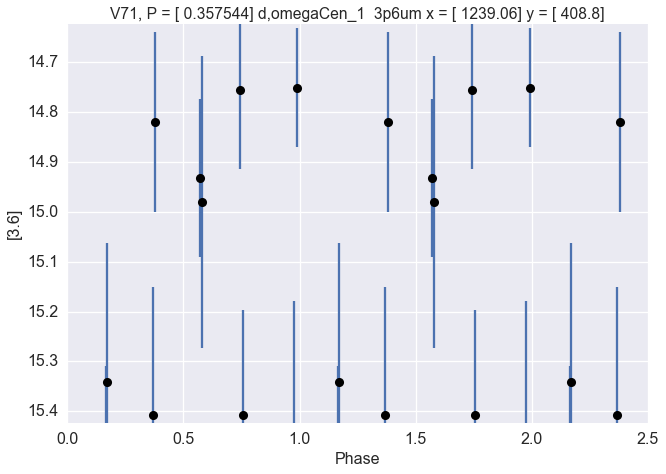

In [26]:
for rrl in np.arange(len(huge_df)):
    kal_id = huge_df.ID[rrl]
    shp = int(mjds.shape[0])
    mag = huge_df[lc_mag_columns].loc[huge_df['ID'] == kal_id].values.reshape(shp)
    err = huge_df[lc_err_columns].loc[huge_df['ID'] == kal_id].values.reshape(shp)
    period = huge_df.Period.loc[huge_df['ID'] == kal_id].values
    xc = huge_df.xc_ref.loc[huge_df['ID'] == kal_id].values
    yc = huge_df.yc_ref.loc[huge_df['ID'] == kal_id].values
 
    idx = np.argsort(mjds)
    mjds = mjds[idx]
    mag = mag[idx]
    err = err[idx]
    phase = (mjds / period) - np.floor(mjds / period)
    phase = np.concatenate((phase,(phase+1.0),(phase+2.0),(phase+3.0),(phase+4.0)))
    
    mag_long  = np.concatenate((mag, mag, mag, mag, mag))
    
    err_long = np.concatenate((err, err, err, err, err))
    obs = np.arange(1, num_frames+1, 1)


    output = str(kal_id) + '_rrlyrae.data'
    output_file = open(new_dir + '/' + output, "w")

    for frame in np.arange(0, num_frames):
        output_file.write("{0:.8f} {1:.3f} {2:.3f} \n".format(mjds[frame], mag[frame], err[frame]))
    
    output_file.close()
    ## Sanity check plot

    mp.close()
    mp.clf()
    axp1 = mp.subplot(111)

    axp1.axis([0,2.5,(np.average(mag) + 0.4),(np.average(mag) - 0.4)])


    axp1.errorbar(phase, mag_long, yerr=err_long, ls='None')
    axp1.plot(phase, mag_long, 'ko', ls='None')
    mp.xlabel("Phase")
    if (channel == '3p6um'): mp.ylabel('[3.6]')
    if (channel == '4p5um'): mp.ylabel('[4.5]')
    mp.title(kal_id + ', P = ' + str(period) +' d,' + input_target + '  ' + channel + ' x = ' + str(xc) + ' y = ' +  str(yc))
    #mp.show()

    mp.savefig(new_dir + '/' + str(kal_id) + '_F' + field + '_' + channel +'.pdf')

    #mp.close()
   

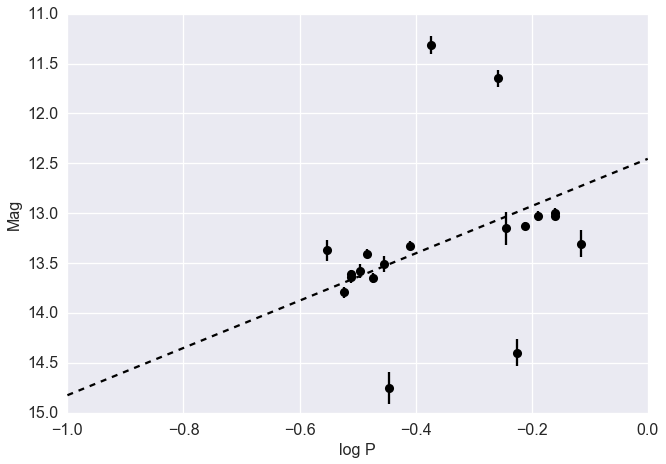

In [27]:

### Doing some quality checks on the matching
mp.close()
mp.clf()
axp1 = mp.subplot(111)

lp1 = np.arange(-1., 1, 1)
def pl1(logp, zp):
    return -2.355 * logp + zp

huge_df['logP'] = np.log10(huge_df.Period)
#huge_df.logP[np.where(huge_df['Type']=='RR1')] = np.log10(huge_df.Period) + 0.127

#huge_df['logP'][np.where(huge_df['Type']=='RR1')] = huge_df['logP'] + 0.127

popt, pcov = curve_fit(pl1,huge_df.logP,huge_df.mag)
zp = popt[0]
ezp = np.sqrt(float(pcov[0]))

mp.gca().invert_yaxis()
mp.xlabel('log P')
mp.ylabel('Mag')
axp1.errorbar(huge_df.logP, huge_df.mag, yerr=huge_df.err, color='k', ls='none')
axp1.plot(huge_df.logP, huge_df.mag, 'ko')
axp1.plot(lp1, -2.370*lp1 + zp, 'k--')


In [28]:
#### now reject some shit

## first rejecting on obviously bad matches

huge_df['reject'] = False
hdu_list = fits.open(ref_image)
image_data = hdu_list[0].data
hdu_list.close()

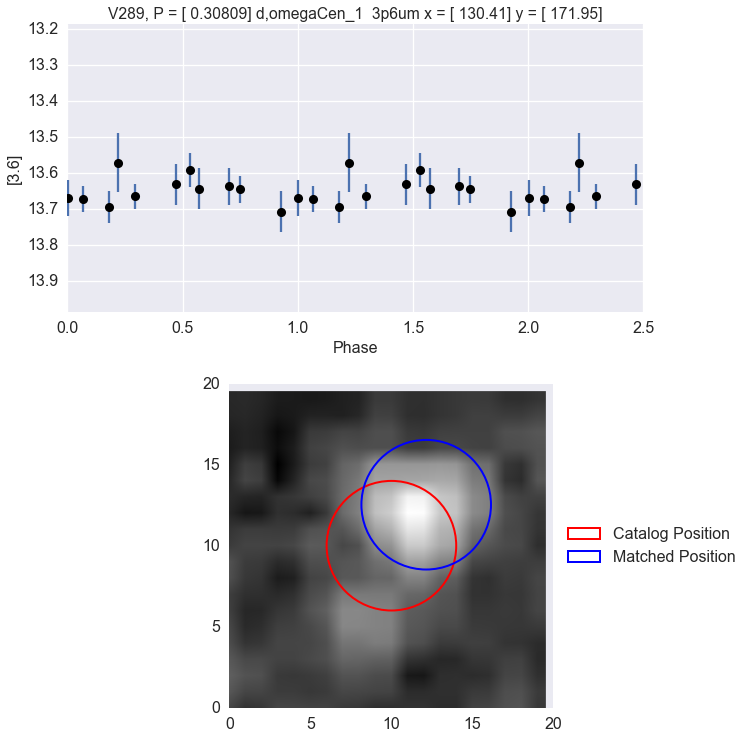

Is this star a good match?
Answer yes or no: no


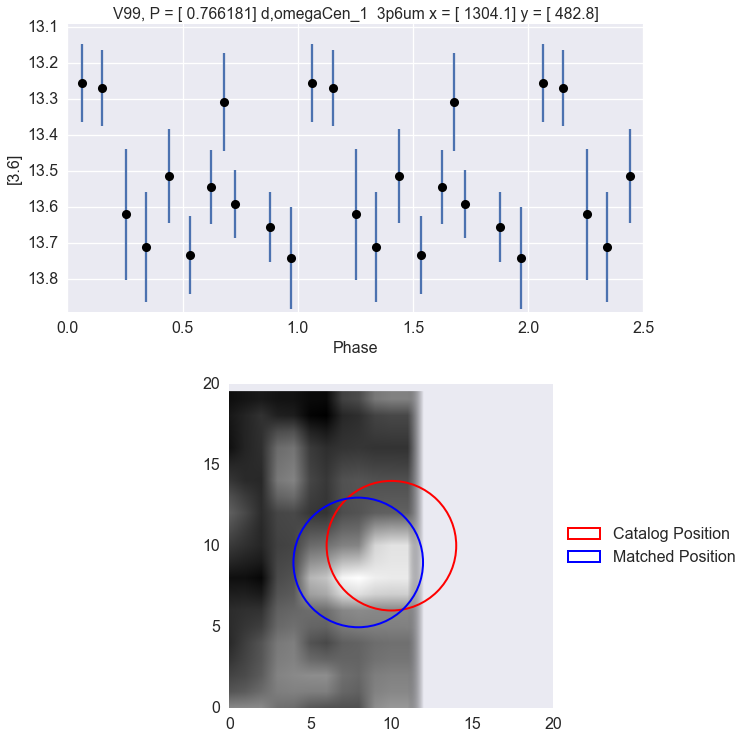

Is this star a good match?
Answer yes or no: no


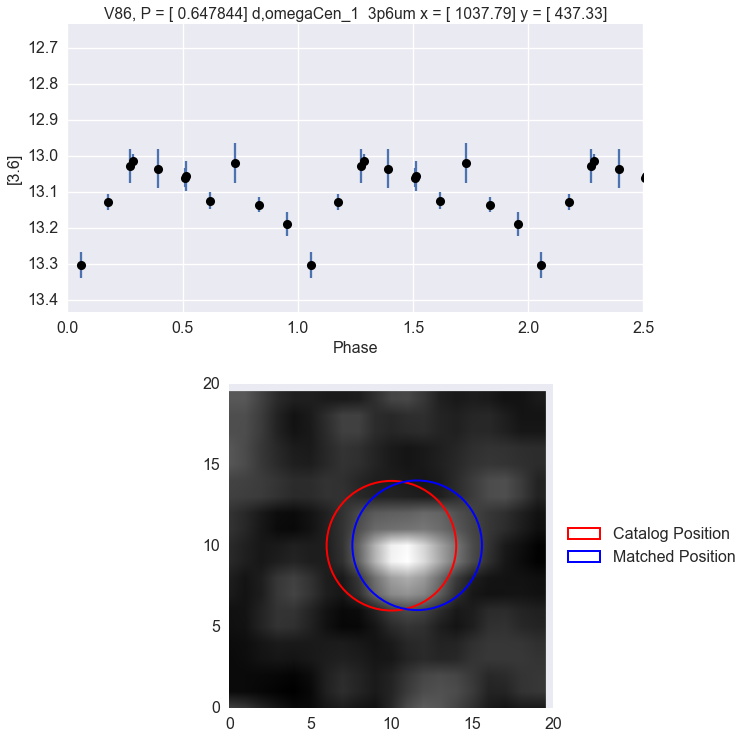

Is this star a good match?
Answer yes or no: yes


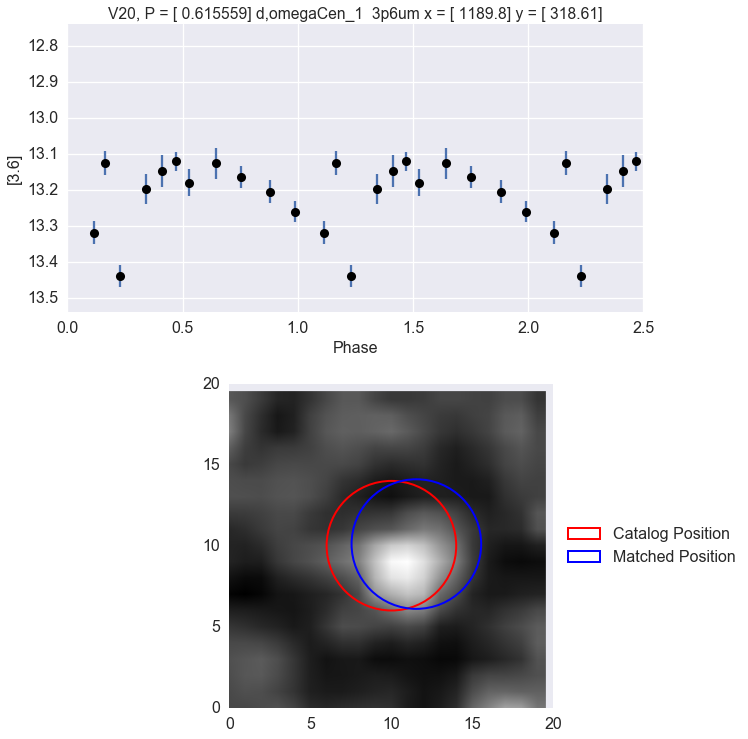

Is this star a good match?
Answer yes or no: yes


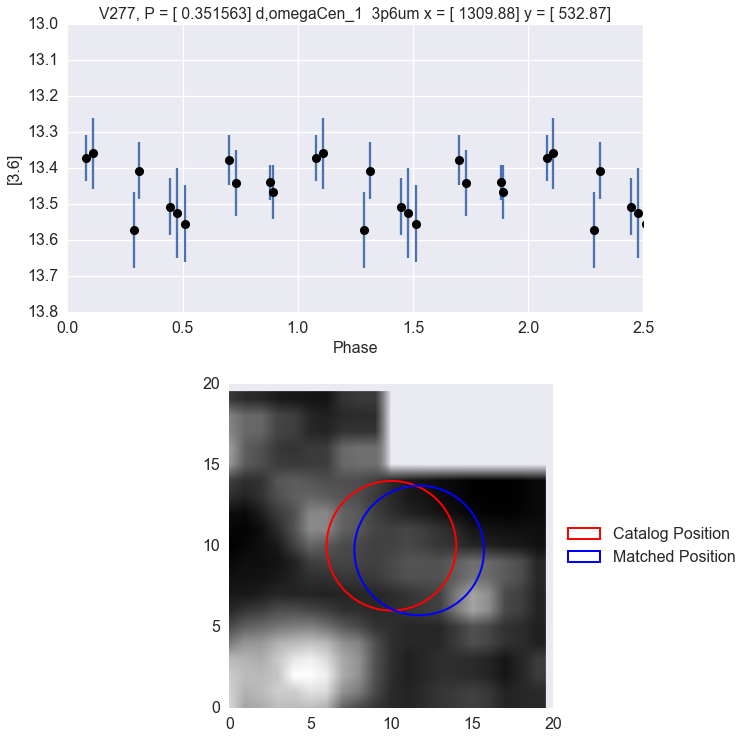

Is this star a good match?
Answer yes or no: no


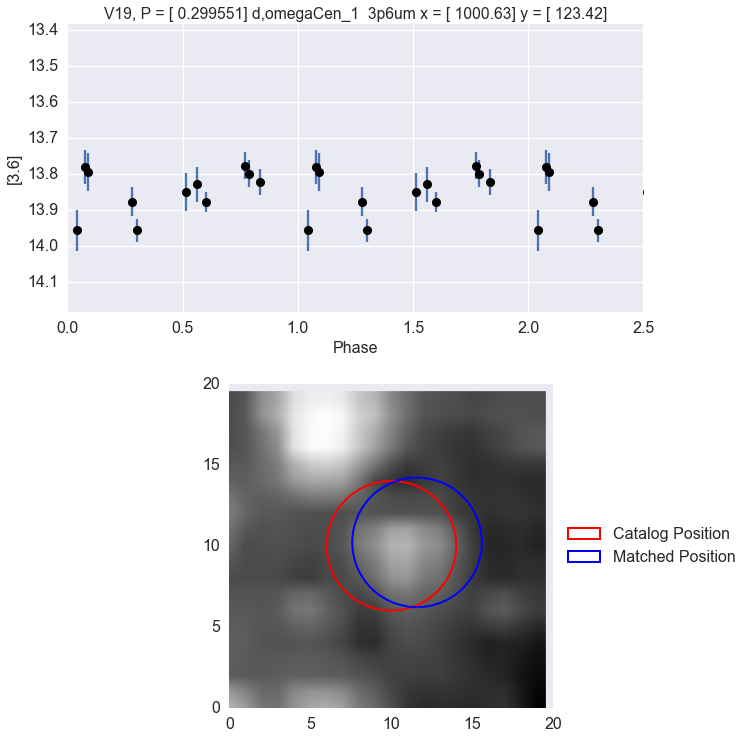

Is this star a good match?
Answer yes or no: yes


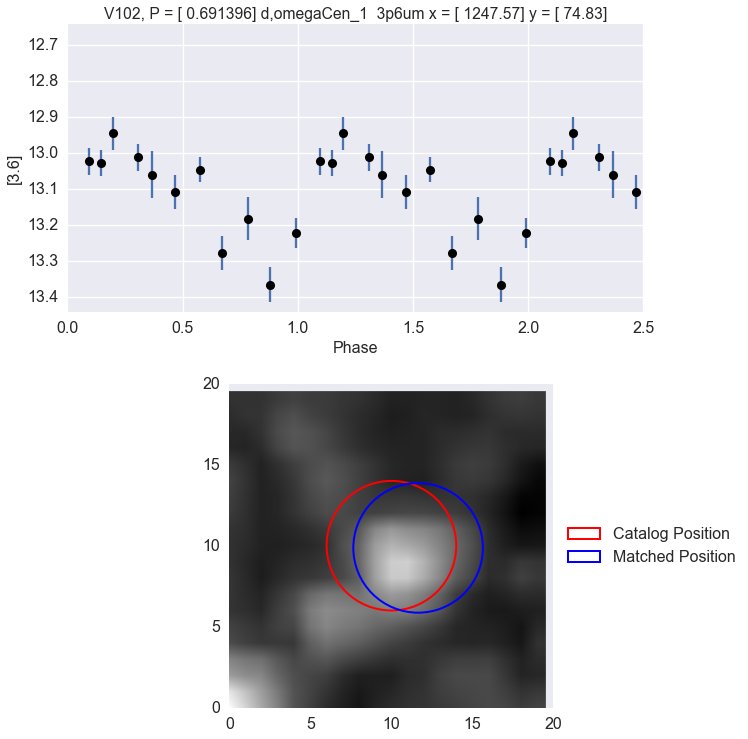

Is this star a good match?
Answer yes or no: yes


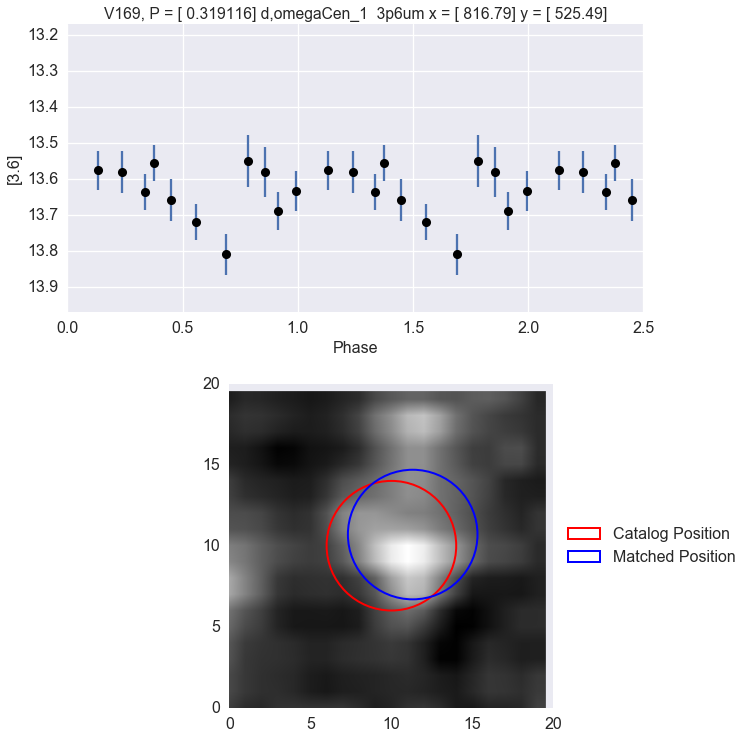

Is this star a good match?
Answer yes or no: yes


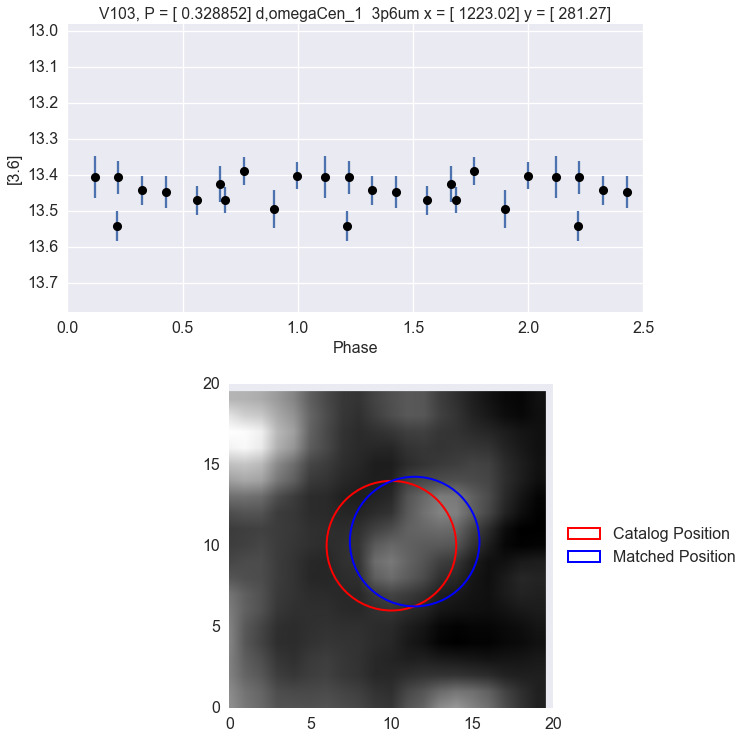

Is this star a good match?
Answer yes or no: yes


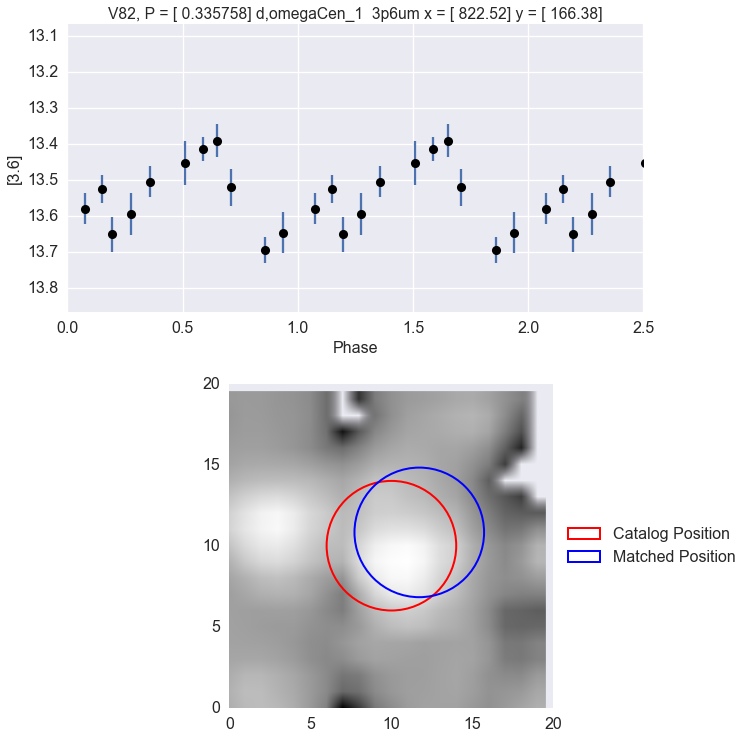

Is this star a good match?
Answer yes or no: yes


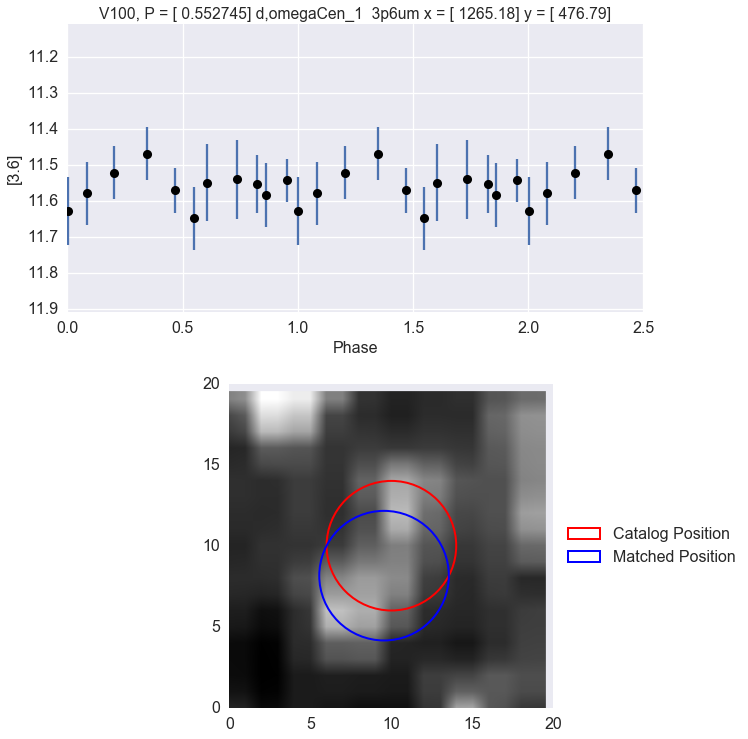

Is this star a good match?
Answer yes or no: yes


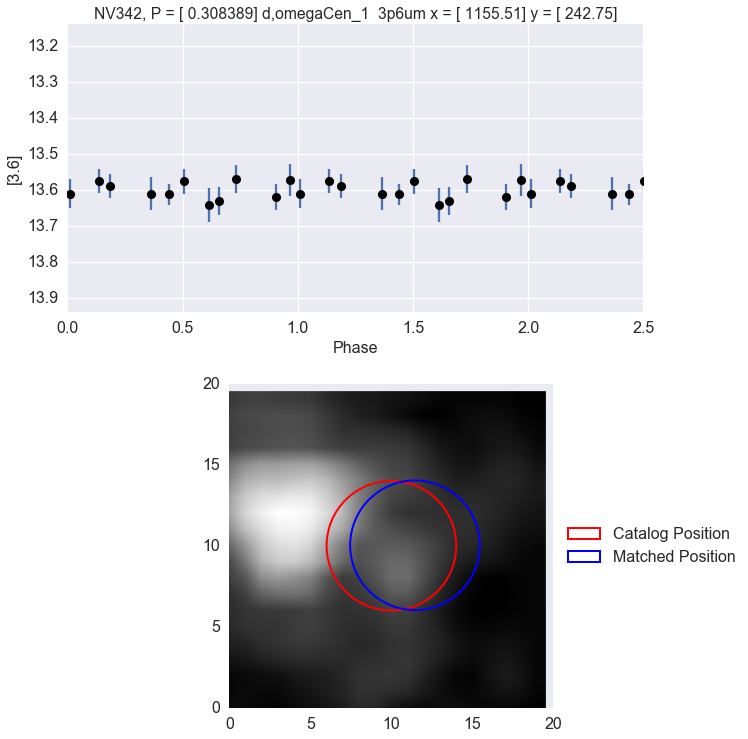

Is this star a good match?
Answer yes or no: yes


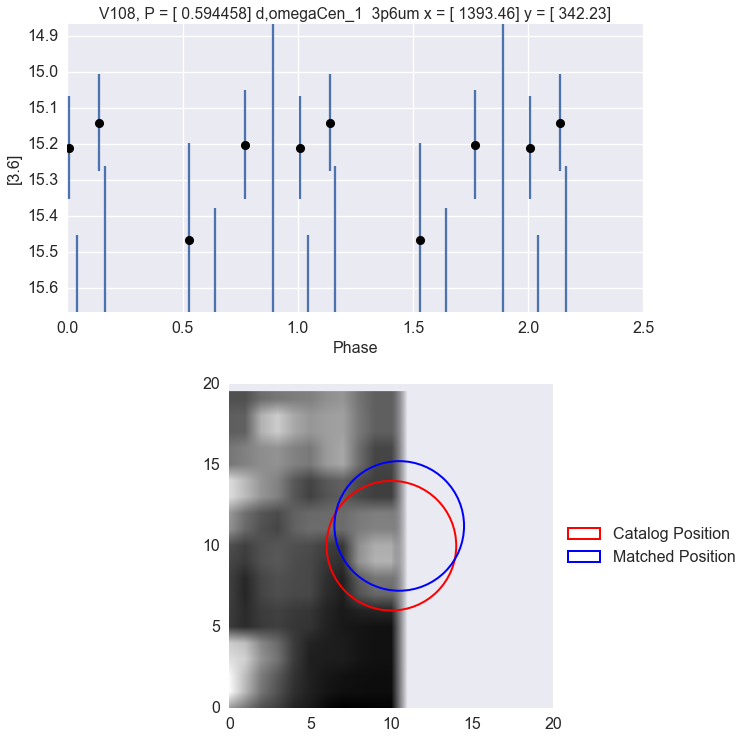

Is this star a good match?
Answer yes or no: no


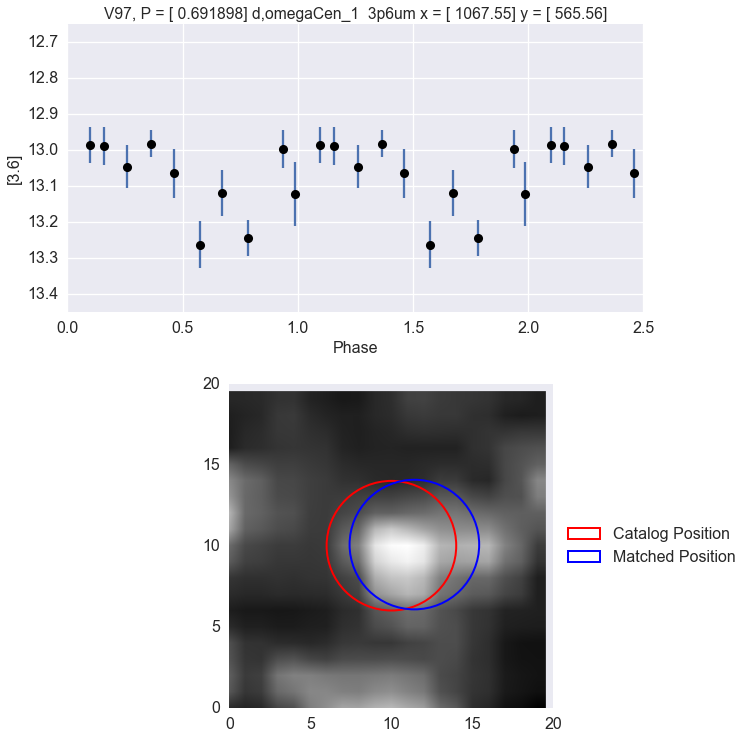

Is this star a good match?
Answer yes or no: yes


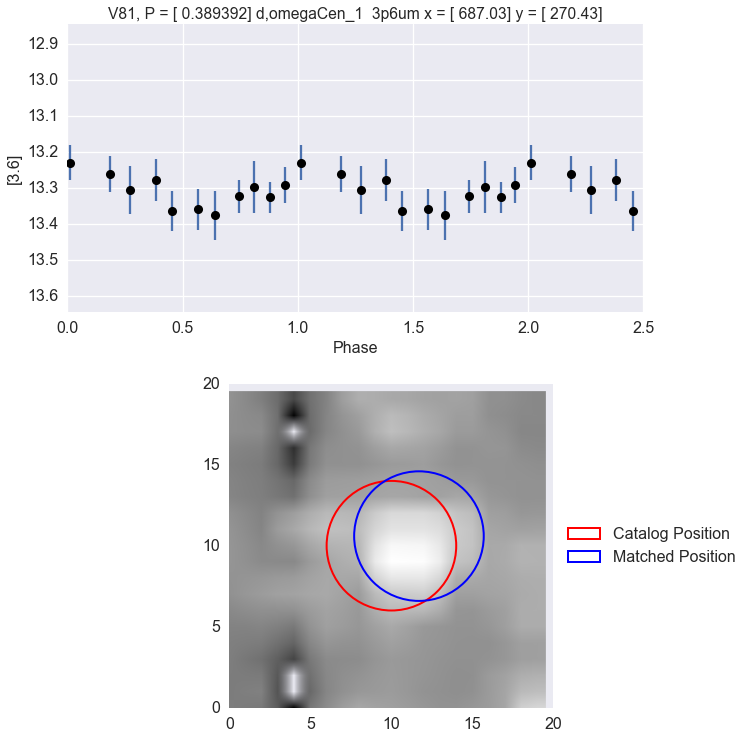

Is this star a good match?
Answer yes or no: yes


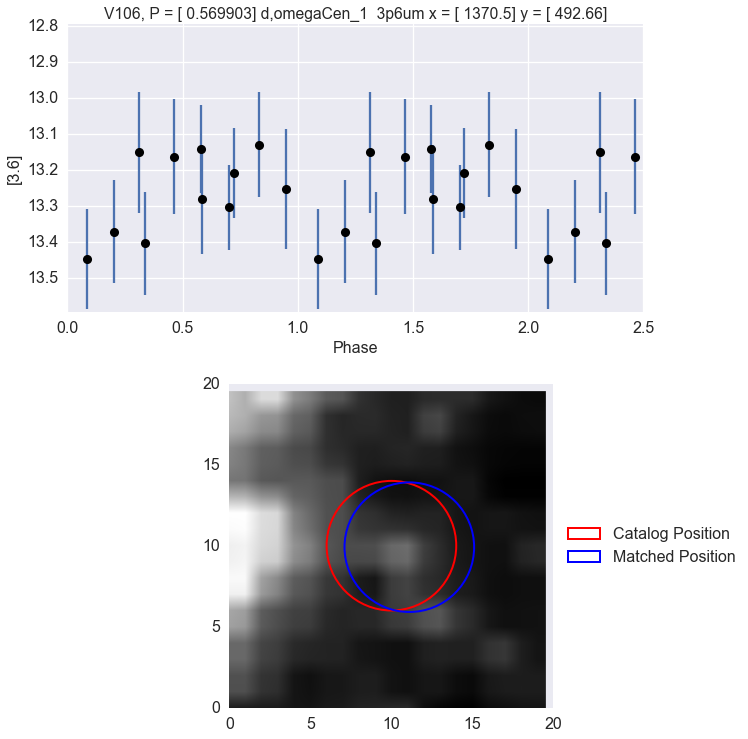

Is this star a good match?
Answer yes or no: no


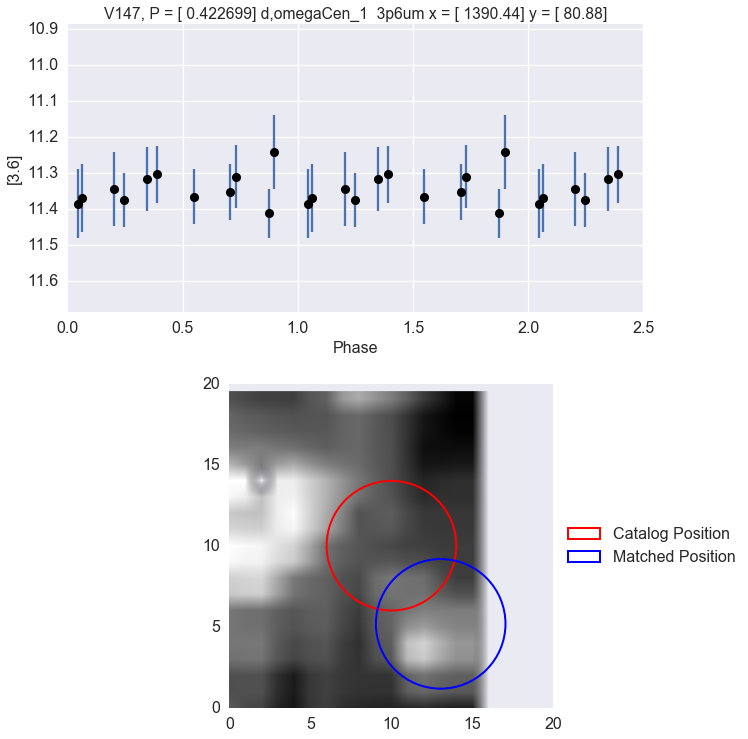

Is this star a good match?
Answer yes or no: no


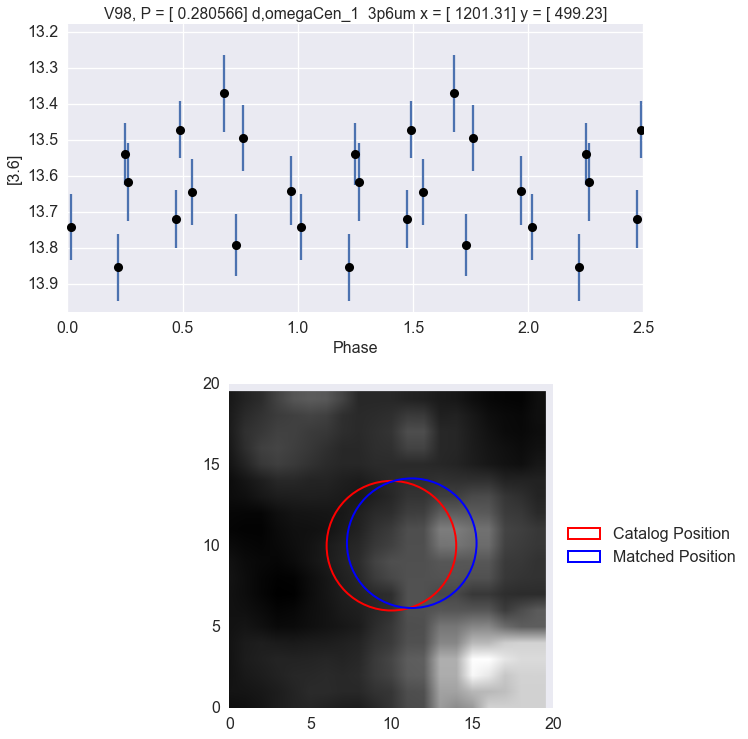

Is this star a good match?
Answer yes or no: yes


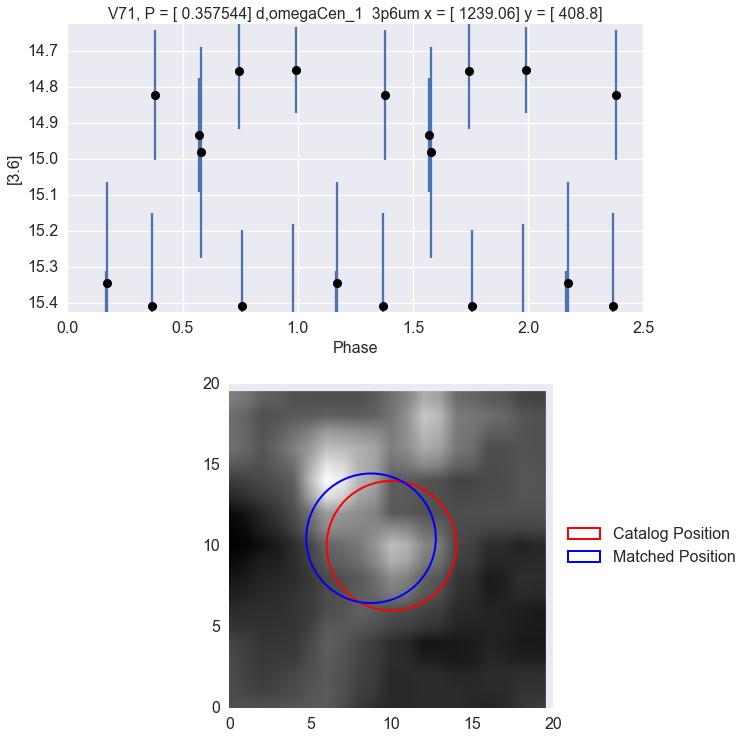

Is this star a good match?
Answer yes or no: no


In [29]:
for matched_rrl in np.arange(len(huge_df)):
    kal_id = huge_df.ID[matched_rrl]
    shp = int(mjds.shape[0])
    mag = huge_df[lc_mag_columns].loc[huge_df['ID'] == kal_id].values.reshape(shp)
    err = huge_df[lc_err_columns].loc[huge_df['ID'] == kal_id].values.reshape(shp)
    period = huge_df.Period.loc[huge_df['ID'] == kal_id].values
    xc = huge_df.xc_ref.loc[huge_df['ID'] == kal_id].values
    yc = huge_df.yc_ref.loc[huge_df['ID'] == kal_id].values
    xc_kal = huge_df.xc_kal.loc[huge_df['ID'] == kal_id].values
    yc_kal = huge_df.yc_kal.loc[huge_df['ID'] == kal_id].values


    idx = np.argsort(mjds)
    mjds = mjds[idx]
    mag = mag[idx]
    err = err[idx]
    phase = (mjds / period) - np.floor(mjds / period)
    phase = np.concatenate((phase,(phase+1.0),(phase+2.0),(phase+3.0),(phase+4.0)))
    
    mag_long  = np.concatenate((mag, mag, mag, mag, mag))
    
    err_long = np.concatenate((err, err, err, err, err))
    obs = np.arange(1, num_frames+1, 1)
    
    mp.close()
    mp.clf()
    
    fig = mp.figure(figsize=(10,10))

    axp1 = fig.add_axes([0.1, 0.6, 0.8, 0.4])


    axp1.axis([0,2.5,(np.average(mag) + 0.4),(np.average(mag) - 0.4)])


    axp1.errorbar(phase, mag_long, yerr=err_long, ls='None')
    axp1.plot(phase, mag_long, 'ko', ls='None')
    mp.xlabel("Phase")
    if (channel == '3p6um'): mp.ylabel('[3.6]')
    if (channel == '4p5um'): mp.ylabel('[4.5]')
    mp.title(kal_id + ', P = ' + str(period) +' d,' + input_target + '  ' + channel + ' x = ' + str(xc) + ' y = ' +  str(yc))
    
    
    size = (20,20)
    position = xc_kal[0], yc_kal[0]
    cutout = Cutout2D(image_data, position, size)
    
    axp2 = fig.add_axes([0.3, 0.05, 0.5, 0.45])
    axp2.imshow(cutout.data, cmap='gray', norm=LogNorm())
    axp2.grid(b=None)
    #axp2.add_artist(Circle(xy=(10, 10), radius=4, edgecolor='red', facecolor='none', linewidth=2, label='Catalog Position'))
    #axp2.add_artist(Circle(xy=((xc-xc_kal)+10, (yc-yc_kal)+10), radius=4, edgecolor='blue', facecolor='none', linewidth=2, label='Matched Position'))
    c = Circle(xy=(10, 10), radius=4, edgecolor='red', facecolor='none', linewidth=2, label='Catalog Position')
    m = Circle(xy=((xc-xc_kal)+10, (yc-yc_kal)+10), radius=4, edgecolor='blue', facecolor='none', linewidth=2, label='Matched Position')
    axp2.add_patch(c)
    axp2.add_patch(m)
    #axp2.plot((xc-xc_kal)+10, (yc-yc_kal)+10, 'o', markersize=20, markeredgewidth=2, markeredgecolor='b', markerfacecolor='None', label='Matched Position')
    mp.xlim(0,20)
    mp.ylim(0,20)
    mp.legend([c, m ], ["Catalog", "Matched"])
    mp.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    
    mp.show()
    
    print 'Is this star a good match?'
    goodstar = raw_input('Answer yes or no: ')
    if(str.lower(goodstar)=='yes' or str.lower(goodstar)=='y'):
        huge_df.loc[matched_rrl, 'reject'] = False
    elif(str.lower(goodstar)=='no' or str.lower(goodstar)=='n'):
        huge_df.loc[matched_rrl, 'reject'] = True
    else:
        print 'Is this star a good match?'
        goodstar = raw_input('Answer yes or no: ')
          
    mp.close()
    mp.clf()
    

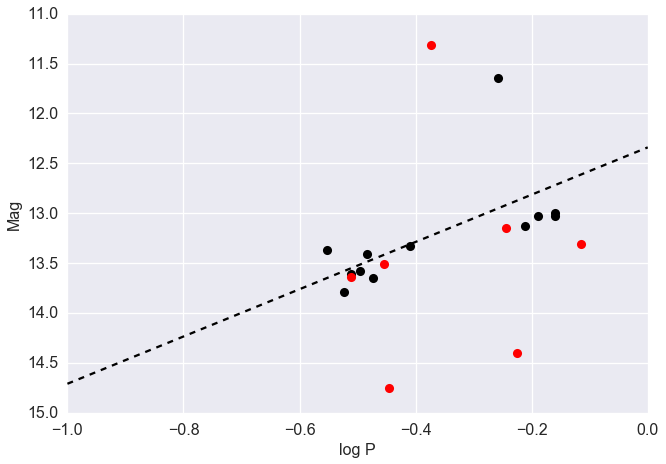

In [30]:

### Doing some quality checks on the matching
mp.close()
mp.clf()
axp1 = mp.subplot(111)

lp1 = np.arange(-1., 1, 1)
def pl1(logp, zp):
    return -2.370 * logp + zp

huge_df['logP'] = np.log10(huge_df.Period)
#huge_df.logP[np.where(huge_df['Type']=='RR1')] = np.log10(huge_df.Period) + 0.127

#huge_df['logP'][np.where(huge_df['Type']=='RR1')] = huge_df['logP'] + 0.127

popt, pcov = curve_fit(pl1,huge_df.logP[huge_df.reject==False],huge_df.mag[huge_df.reject==False])
zp = popt[0]
ezp = np.sqrt(float(pcov[0]))

mp.gca().invert_yaxis()
mp.xlabel('log P')
mp.ylabel('Mag')
#axp1.errorbar(huge_df.logP[huge_df.reject==False], huge_df.mag[huge_df.reject==False], yerr=huge_df.err[huge_df.reject==False], color='k', ls='none')


#axp1.errorbar(huge_df.logP[huge_df.reject==True], huge_df.mag[huge_df.reject==True], yerr=huge_df.err[huge_df.reject==True], color='r', ls='none')


#axp1.errorbar(huge_df.logP[huge_df.reject==True], huge_df.mag[huge_df.reject==True], yerr=huge_df.err[huge_df.reject==True], color='red', ls='none')

axp1.plot(huge_df.logP[huge_df.reject==False], huge_df.mag[huge_df.reject==False], 'ko')

axp1.plot(huge_df.logP[huge_df.reject==True], huge_df.mag[huge_df.reject==True], 'o', color='red')

axp1.plot(lp1, -2.370*lp1 + zp, 'k--')


In [147]:
### define rematch function here:

### cut the input_lc_df around the catalog position, pulling out the data for a few stars, plotting lightcurves for a few stars. get the user to pick the most likely one

#def rematch(ID, xc, yc, xc_kal, yc_kal, mjds, period, shp):
def rematch(row, mjds):
    kal_id = row['ID']
    xc = row['xc_ref']
    yc = row['yc_ref']
    xc_kal = row['xc_kal']
    yc_kal = row['yc_kal']
    period = row['Period']
    shp = int(mjds.shape[0])
    print xc_kal, yc_kal
    
    search_df = input_lc_df[(input_lc_df.xc>(xc_kal-10))]
    search_df = search_df[(search_df.xc<(xc_kal+10))]
    search_df = search_df[(search_df.yc<(yc_kal+10))]
    search_df = search_df[(search_df.yc>(yc_kal-10))]
    mag = huge_df[lc_mag_columns].loc[huge_df['ID'] == kal_id].values.reshape(shp)
    err = huge_df[lc_err_columns].loc[huge_df['ID'] == kal_id].values.reshape(shp)

    mjds = mjds[idx]
    mag = mag[idx]
    err = err[idx]
    phase = (mjds / period) - np.floor(mjds / period)
    phase = np.concatenate((phase,(phase+1.0),(phase+2.0),(phase+3.0),(phase+4.0)))

    orig_lc = np.concatenate((mag, mag, mag, mag, mag))
    orig_err = np.concatenate((err, err, err, err, err))
    
    mean_orig = np.mean(orig_lc)
    
    n_stars = len(search_df)
    print n_stars
    
    sns.set(style="darkgrid")
    sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.0})
    sns.set_palette("Set2", n_stars)

    palette = itertools.cycle(sns.color_palette())
    starcol = next(palette)
    
    mp.close()
    mp.clf()
    fig = mp.figure(figsize=(10,10))
    
    size = (25,20)
    position = xc_kal, yc_kal
    cutout = Cutout2D(image_data, position, size)
    
    axp1 = fig.add_axes([0.1, 0.6, 0.55, 0.3])

    axp1.errorbar(phase, orig_lc, yerr=orig_err, color=starcol, ls='None')
    axp1.plot(phase, orig_lc, 'o', c=starcol, ls='None', label = 'Original match')
    mp.xlabel("Phase")
    if (channel == '3p6um'): mp.ylabel('[3.6]')
    if (channel == '4p5um'): mp.ylabel('[4.5]')
    mp.title(kal_id + ', P = ' + str(period) +' d,' + input_target + '  ' + channel)
    
    axp2 = fig.add_axes([0.7, 0.6, 0.3, 0.3])
    axp2.imshow(cutout.data, cmap='gray', norm=LogNorm())
    axp2.grid(b=None)
    mp.xlim(0,20)
    mp.ylim(0,20)

    
    c = Circle(xy=(10, 10), radius=4, edgecolor='red', facecolor='none', linewidth=2, label='Catalog Position')
    m = Circle(xy=((xc-xc_kal)+10, (yc-yc_kal)+10), radius=0.5, edgecolor=starcol, facecolor='none', linewidth=2, label='Original Position')
    axp2.add_patch(c)
    axp2.add_patch(m)
    
    axp1.axis([0,2.5,(np.average(mag) + 0.5),(np.average(mag) - 0.5)])

    search_df = search_df.reset_index(drop=True)
    possibles = []
    count = 1
    for lcs in np.arange(len(search_df) - 1):
        
        if(search_df.xc[lcs]!=xc and search_df.yc[lcs]!=yc):
            starcol = next(palette)
            star_id = search_df.als_id[lcs]
            possibles.append(int(star_id))
            x_star = search_df.xc[lcs]
            y_star = search_df.yc[lcs]
            new_mag = search_df[lc_mag_columns].loc[lcs].values.reshape(shp)
            new_err = search_df[lc_err_columns].loc[lcs].values.reshape(shp)
            new_mag = new_mag[idx]
            new_err = new_err[idx]
            temp_phase = []
            temp_phase = (mjds / period) - np.floor(mjds / period)
            temp_phase = np.concatenate((temp_phase,(temp_phase+1.0),(temp_phase+2.0),(temp_phase+3.0),(temp_phase+4.0)))
            temp_lc = np.concatenate((new_mag, new_mag, new_mag, new_mag, new_mag))
            temp_err = np.concatenate((new_err, new_err, new_err, new_err, new_err))
            
            delta_mag = np.mean(temp_lc) - mean_orig + (count * 0.1)
            if delta_mag < 0:
                delta_mag_sign = '-'
            else:
                delta_mag_sign = '+'
            name = str(int(star_id)) + delta_mag_sign + str(np.round(abs(delta_mag), decimals=2))
            circ = (Circle(xy=((x_star-xc_kal)+10, (y_star-yc_kal)+10), radius=0.5, edgecolor=starcol, facecolor='none', linewidth=2, label=name))
            axp2.add_patch(circ)

            #print 'als_id:' + star_id + 'delta mag:' + delta_mag
            
            #print len(temp_phase), len(temp_lc), len(temp_err)
            axp1.errorbar(temp_phase, temp_lc - delta_mag, yerr=temp_err, color=starcol, ls='None')
            axp1.plot(temp_phase, temp_lc - delta_mag, 'o', c=starcol, ls='None', label=(name)
            mp.legend(markerscale=1)
            mp.legend(loc=9, bbox_to_anchor=(0.5, -0.1))
            count = count + 1

    mp.show()
    
    print 'Are any of these good stars?'
    goodstar = raw_input('Answer yes or no: ')
    if(str.lower(goodstar)=='yes' or str.lower(goodstar)=='y'):
        print 'Enter "o" for Original match or "a" to enter alternate match ID'
        print 'Otherwise enter "r" to reject all stars'
        selection = raw_input('Enter selection: ')
        if (str.lower(selection)=='o'):
            huge_df.ix[huge_df.ID==kal_id, 'reject'] = False
            return('original')
        elif(str.lower(selection)=='r'):
            return('rejected')
        elif(str.lower(selection)=='a'):
            print "Possible Alternate IDs:"
            print possibles
            alt_id = raw_input('Enter ID number of alternate match: ')
            if(alt_id in possibles):
                good_df = search_df[search_df.als_id==alt_id]
                huge_df.ix[huge_df.ID==kal_id, 'Rematch'] = alt_id
                #huge_df.ix[huge_df.ID==kal_id, 'als_id'] = alt_id
                #huge_df.ix[huge_df.ID==kal_id, 'xc_lc'] = good_df.xc.values
                #huge_df.ix[huge_df.ID==kal_id, 'yc_lc'] = good_df.yc.values
                #huge_df.ix[huge_df.ID==kal_id, lc_mag_columns] = good_df[lc_mag_columns]
                #huge_df.ix[huge_df.ID==kal_id, lc_err_columns] = good_df[lc_err_columns]
                #huge_df.ix[huge_df.ID==kal_id, 'reject'] = False
                return('accepted new')
            else:
                print 'Rejecting all stars'
                return('reject')

    if(str.lower(goodstar)=='no' or str.lower(goodstar)=='n'):
        print 'Rejecting all stars'
        return('reject')
    

            
 
    

SyntaxError: invalid syntax (<ipython-input-147-2086fcf37c6f>, line 110)

V71 1239.06 408.8 1240.31905558 408.34192489 [ 56422.85451617  56422.92788332  56423.00702571  56423.07741141
  56423.1499823   56423.21695329  56423.29535516  56423.36265968
  56423.43911502  56423.51044351  56423.58022279  56423.65783537] 0.357544 12


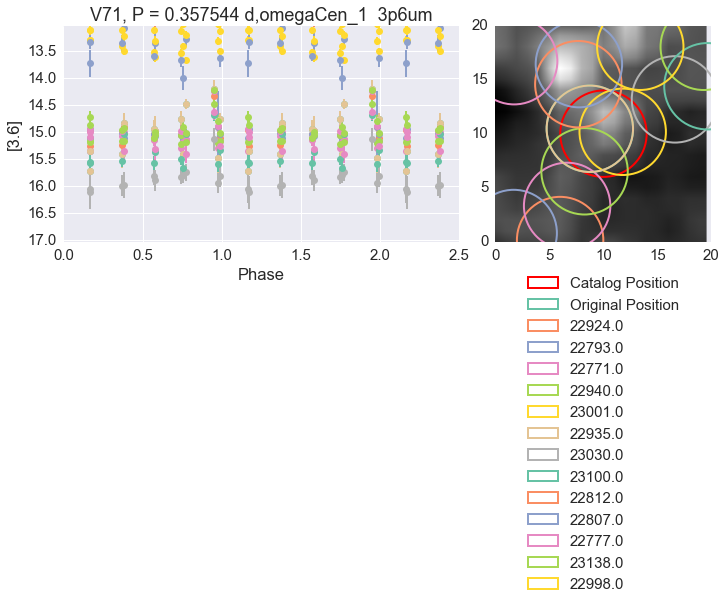

Are any of these good stars?
Answer yes or no: yes
Enter "o" for Original match or "a" to enter alternate match ID
Otherwise enter "r" to reject all stars
Enter selection: a
Possible Alternate IDs:
[22924, 22793, 22771, 22940, 23001, 22935, 23030, 23100, 22812, 22807, 22777, 23138, 22998]
Enter ID number of alternate match: 23001
V71 1239.06 408.8 1240.31905558 408.34192489 [ 56422.85451617  56422.92788332  56423.00702571  56423.07741141
  56423.1499823   56423.21695329  56423.29535516  56423.36265968
  56423.43911502  56423.51044351  56423.58022279  56423.65783537] 0.357544 12


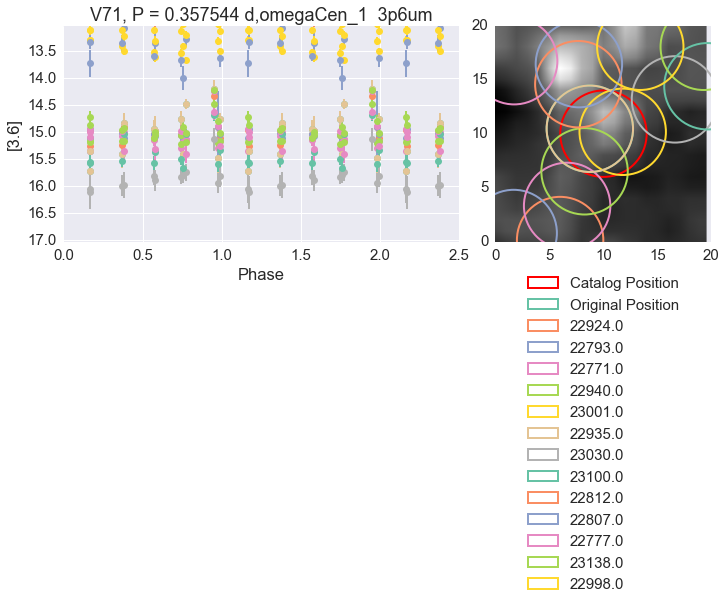

Are any of these good stars?
Answer yes or no: n
V71 1239.06 408.8 1240.31905558 408.34192489 [ 56422.85451617  56422.92788332  56423.00702571  56423.07741141
  56423.1499823   56423.21695329  56423.29535516  56423.36265968
  56423.43911502  56423.51044351  56423.58022279  56423.65783537] 0.357544 12


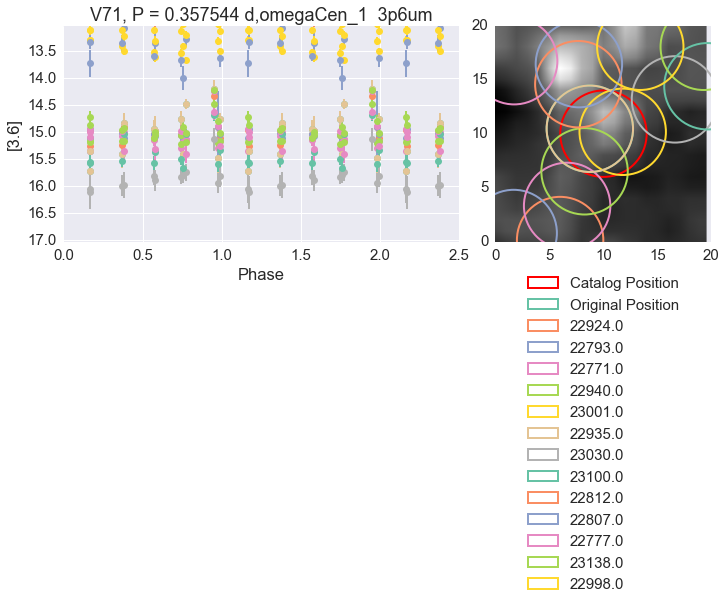

Are any of these good stars?
Answer yes or no: n
V71 1239.06 408.8 1240.31905558 408.34192489 [ 56422.85451617  56422.92788332  56423.00702571  56423.07741141
  56423.1499823   56423.21695329  56423.29535516  56423.36265968
  56423.43911502  56423.51044351  56423.58022279  56423.65783537] 0.357544 12


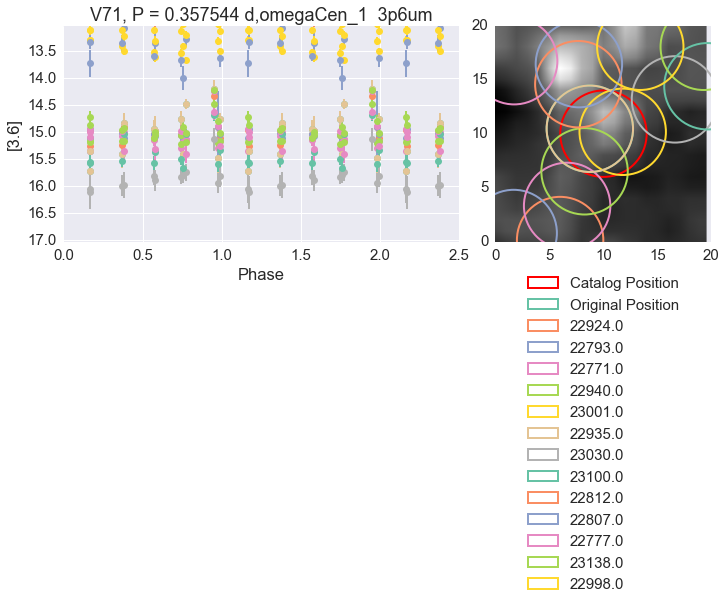

Are any of these good stars?


KeyboardInterrupt: 

In [312]:
### Try and find better matches for rejected stars

for rejects in np.arange(len(huge_df.reject==True)):
    kal_id = huge_df.ID[matched_rrl]
    shp = int(mjds.shape[0])
    mag = huge_df[lc_mag_columns].loc[huge_df['ID'] == kal_id].values.reshape(shp)
    err = huge_df[lc_err_columns].loc[huge_df['ID'] == kal_id].values.reshape(shp)
    period = huge_df.Period.loc[huge_df['ID'] == kal_id].values
    xc = huge_df.xc_ref.loc[huge_df['ID'] == kal_id].values
    yc = huge_df.yc_ref.loc[huge_df['ID'] == kal_id].values
    xc_kal = huge_df.xc_kal.loc[huge_df['ID'] == kal_id].values
    yc_kal = huge_df.yc_kal.loc[huge_df['ID'] == kal_id].values
    
    print kal_id, xc[0], yc[0], xc_kal[0], yc_kal[0], mjds, period[0], shp

    rematch(kal_id, xc[0], yc[0], xc_kal[0], yc_kal[0], mjds, period[0], shp)
 

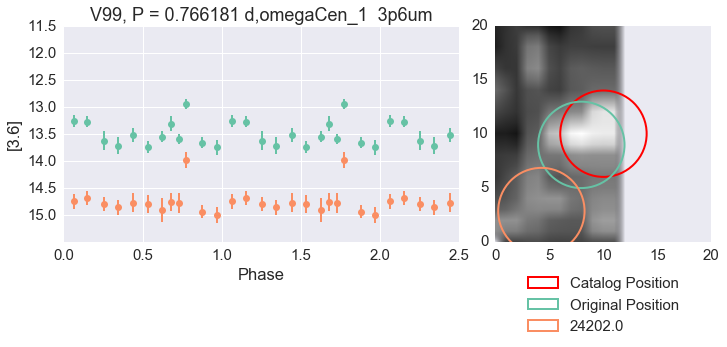

Are any of these good stars?
Answer yes or no: n


In [307]:
rematch('V99', 1304.1, 482.8, 1306.1493483720342, 483.83362618404897, mjds, 0.766181, 12)

In [305]:
kal_id=='V99'
huge_df.ix[huge_df.ID==kal_id, 'als_id']

18    22935
Name: als_id, dtype: int64

In [62]:
huge_df['Rematch'] = False

1306.14934837 483.833626184
2


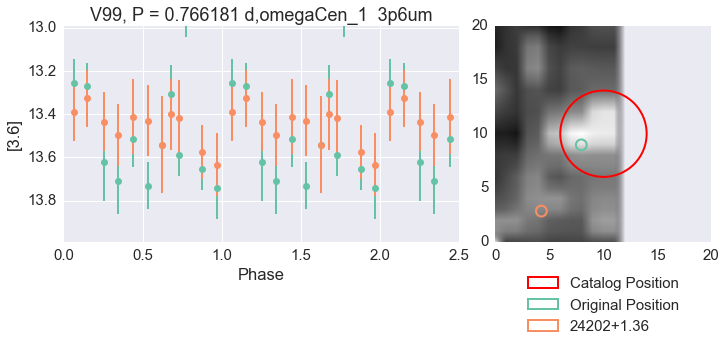

Are any of these good stars?
Answer yes or no: n
Rejecting all stars
1308.16808339 533.160518951
5


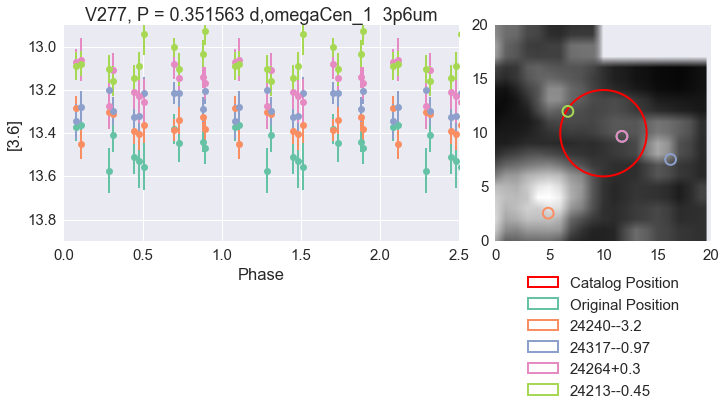

Are any of these good stars?


KeyboardInterrupt: 

In [148]:
huge_df[huge_df.reject==True].apply(lambda line: rematch(line, mjds), axis=1)

In [136]:
row = huge_df[huge_df.ID=='V71']
row

,als_id,xc_ref,yc_ref,mag,err,lcorr,ID,RA,Dec,Period,...,err_9,mag_10,err_10,mag_11,err_11,mag_12,err_12,logP,reject,Rematch
18,22935,1239.06,408.8,14.755,0.16,1.01,V71,13:27:08.08,-47:27:51.6,0.357544,...,0.181,14.98,0.293,14.474,0.092,14.751,0.119,-0.446671,True,False


In [138]:
rematch(row, mjds)

18    1240.319056
Name: xc_kal, dtype: float64 18    1240.319056
Name: xc_kal, dtype: float64


ValueError: Series lengths must match to compare

In [37]:
huge_df[huge_df.reject==True]

,als_id,xc_ref,yc_ref,mag,err,lcorr,ID,RA,Dec,Period,...,mag_9,err_9,mag_10,err_10,mag_11,err_11,mag_12,err_12,logP,reject
0,1217,130.41,171.95,13.643,0.058,0.988,V289,13:28:03.68,-47:21:27.9,0.308090,...,13.631,0.057,13.637,0.051,13.708,0.057,13.694,0.044,-0.511322,True
1,24177,1304.10,482.80,13.307,0.136,0.996,V99,13:27:02.16,-47:27:48.8,0.766181,...,13.513,0.130,13.732,0.109,13.543,0.103,13.591,0.095,-0.115669,True
4,24264,1309.88,532.87,13.508,0.079,0.990,V277,13:26:59.97,-47:27:29.2,0.351563,...,13.360,0.099,13.408,0.079,13.555,0.108,13.443,0.091,-0.453997,True
12,25363,1393.46,342.23,14.398,0.136,1.005,V108,13:27:04.71,-47:29:25.7,0.594458,...,15.203,0.152,17.257,2.615,15.211,0.143,15.142,0.134,-0.225879,True
15,25083,1370.50,492.66,13.152,0.169,0.992,V106,13:26:59.19,-47:28:12.5,0.569903,...,13.405,0.142,13.164,0.159,13.282,0.151,13.210,0.125,-0.244199,True
16,25338,1390.44,80.88,11.316,0.090,1.003,V147,13:27:15.86,-47:31:09.2,0.422699,...,11.309,0.087,11.240,0.103,11.369,0.094,11.374,0.074,-0.373969,True
18,22935,1239.06,408.80,14.755,0.160,1.010,V71,13:27:08.08,-47:27:51.6,0.357544,...,14.820,0.181,14.980,0.293,14.474,0.092,14.751,0.119,-0.446671,True


In [97]:

x_test = 130.41
y_test = 171.95

input_lc_df.iloc[(input_lc_df.xc>(x_test-10))]


#df.iloc[0:df[df.year == 'y3'].index[0]]

NotImplementedError: iLocation based boolean indexing on an integer type is not available

In [104]:
search_df = input_lc_df[(input_lc_df.xc>(x_test-10))]
search_df = search_df[(search_df.xc<(x_test+10))]
search_df = search_df[(search_df.yc<(y_test+10))]
search_df = search_df[(search_df.yc>(y_test-10))]
search_df


,als_id,xc,yc,mag_1,err_1,mag_2,err_2,mag_3,err_3,mag_4,...,mag_8,err_8,mag_9,err_9,mag_10,err_10,mag_11,err_11,mag_12,err_12
2370,1171.0,127.386,165.178,16.332,0.056,15.342,0.040,16.326,0.051,16.306,...,16.248,0.051,16.308,0.052,16.305,0.059,16.096,0.056,16.383,0.053
2479,1217.0,130.409,171.951,13.643,0.058,12.896,0.045,13.671,0.036,13.665,...,13.571,0.081,13.631,0.057,13.637,0.051,13.708,0.057,13.694,0.044


In [105]:
shp

12

In [108]:
test = np.zeros((12,2))

In [128]:
test = np.arange(0,6), np.arange(6,12)

In [120]:
test = [[1,2,3,4,5][6,7,8,9,10]]

TypeError: list indices must be integers, not tuple

In [121]:
test = np.zeros((12,2))

In [129]:
test

(array([0, 1, 2, 3, 4, 5]), array([ 6,  7,  8,  9, 10, 11]))

In [130]:
test

(array([0, 1, 2, 3, 4, 5]), array([ 6,  7,  8,  9, 10, 11]))

In [131]:
test[1]

array([ 6,  7,  8,  9, 10, 11])

In [132]:
test[0]

array([0, 1, 2, 3, 4, 5])

In [140]:
test = np.array(test)

In [146]:
test = test.reshape(6,2)

In [152]:
test[:,1]

array([ 1,  3,  5,  7,  9, 11])

In [287]:
huge_df

,als_id,xc_ref,yc_ref,mag,err,lcorr,ID,RA,Dec,Period,...,mag_9,err_9,mag_10,err_10,mag_11,err_11,mag_12,err_12,logP,reject
0,1217,130.41,171.95,13.643,0.058,0.988,V289,13:28:03.68,-47:21:27.9,0.308090,...,13.631,0.057,13.637,0.051,13.708,0.057,13.694,0.044,-0.511322,False
1,24177,1304.10,482.80,13.307,0.136,0.996,V99,13:27:02.16,-47:27:48.8,0.766181,...,13.513,0.130,13.732,0.109,13.543,0.103,13.591,0.095,-0.115669,True
2,18722,1037.79,437.33,13.029,0.048,1.007,V86,13:27:15.19,-47:26:11.1,0.647844,...,13.128,0.022,13.016,0.021,13.036,0.053,13.056,0.042,-0.188530,False
3,21944,1189.80,318.61,13.125,0.034,1.013,V20,13:27:14.05,-47:28:06.3,0.615559,...,13.319,0.031,13.439,0.031,13.197,0.042,13.121,0.027,-0.210730,False
4,24264,1309.88,532.87,13.508,0.079,0.990,V277,13:26:59.97,-47:27:29.2,0.351563,...,13.360,0.099,13.408,0.079,13.555,0.108,13.443,0.091,-0.453997,False
5,17993,1000.63,123.42,13.794,0.053,1.004,V19,13:27:30.14,-47:28:05.2,0.299551,...,13.956,0.057,13.876,0.041,13.849,0.052,13.776,0.037,-0.523529,False
6,22991,1247.57,74.83,13.028,0.036,1.004,V102,13:27:22.11,-47:30:12.3,0.691396,...,13.221,0.041,13.022,0.037,12.944,0.046,13.011,0.038,-0.160273,False
7,14121,816.79,525.49,13.580,0.069,0.976,V169,13:27:20.47,-47:23:59.1,0.319116,...,13.809,0.057,13.688,0.053,13.576,0.055,13.556,0.050,-0.496051,False
8,22689,1223.02,281.27,13.408,0.046,1.013,V103,13:27:14.29,-47:28:36.3,0.328852,...,13.403,0.038,13.542,0.042,13.449,0.044,13.426,0.050,-0.483000,False
9,14214,822.52,166.38,13.651,0.049,0.988,V82,13:27:35.61,-47:26:30.3,0.335758,...,13.647,0.057,13.526,0.039,13.505,0.044,13.414,0.033,-0.473974,False
